<a href="https://colab.research.google.com/github/ChowMeins/Pokemon-CNN/blob/main/data_generation/Pokemon_Encounter_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Download sprite sheet
import requests

url = "https://www.spriters-resource.com/media/assets/17/18502.png?updated=1755472519"
response = requests.get(url)

if response.status_code == 200:
    with open("pokemon_pt_battle_backgrounds.png", "wb") as f:
        f.write(response.content)
    print("Image downloaded successfully!")
else:
    print(f"Failed to download image. Status code: {response.status_code}")

Image downloaded successfully!


In [6]:
# Left side - Field backgrounds
field_names = [
    "field_day", "field_afternoon", "field_night",
    "surf_day", "surf_afternoon", "surf_night",
    "city_day", "city_afternoon", "city_night",
    "forest_day", "forest_afternoon", "forest_night",
    "rocky_day", "rocky_afternoon", "rocky_night",
    "snow_day", "snow_afternoon", "snow_night",
    "indoor_1", "indoor_2", "indoor_3",
    "cave_1", "cave_2", "cave_3",
    "aaron", "bertha", "flint",
    "lucian", "cynthia", "distortion_world",
    "battle_tower", "battle_factory", "battle_arcade",
    "battle_castle", "battle_hall"
]

# Right side - Battle spot platforms
battle_spot_names = [
    "grass_day", "grass_afternoon", "grass_night",
    "water_day", "water_afternoon", "water_night",
    "path_day", "path_afternoon", "path_night",
    "ice_day", "ice_afternoon", "ice_night",
    "rocky_day", "rocky_afternoon", "rocky_night",
    "snow_day", "snow_afternoon", "snow_night",
    "sand_day", "sand_afternoon", "sand_night",
    "mud_day", "mud_afternoon", "mud_night",
    "wet_path_day", "wet_path_afternoon", "wet_path_night",
    "cave", "indoor", "aaron",
    "bertha", "flint", "lucian",
    "cynthia", "distortion_world", "battle_tower",
    "battle_factory", "battle_arcade", "battle_castle",
    "battle_hall"
]

In [7]:
from PIL import Image, ImageFile
import matplotlib.axes
import matplotlib.pyplot as plt
import math

def process(filename: str, img: ImageFile, axes: matplotlib.axes.Axes, names: list, index: int, x1: int, y1: int, x2: int, y2: int) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = Image.open(filename)
    # <something gets done here>
    r, c = index // 3, index % 3
    axes = axes[r, c]
    axes.title.set_text(names[index])
    axes.imshow(img.crop((x1, y1, x2, y2)))
    axes.axis("off")

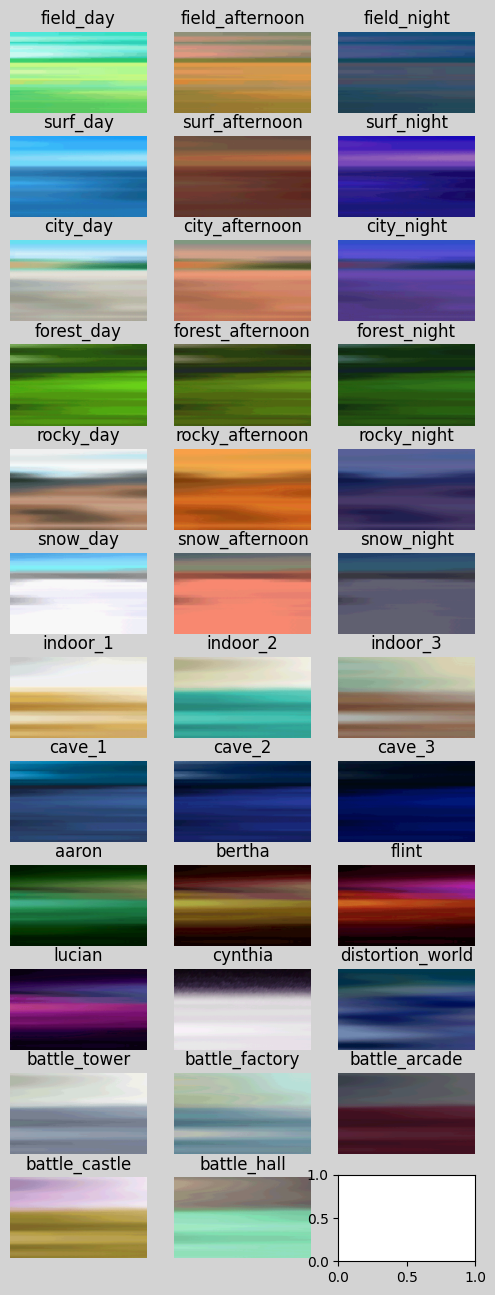

In [8]:
from PIL import Image, ImageFile
import matplotlib.axes
import matplotlib.pyplot as plt
import math

NUM_BACKGROUNDS = 35
file_path = "pokemon_pt_battle_backgrounds.png"
crops = []
nrows, ncols = math.ceil(NUM_BACKGROUNDS / 3), 3
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 16))
fig.set_facecolor("lightgray")
img = Image.open(file_path)

for i in range(NUM_BACKGROUNDS):
  row, col = i // 3, i % 3
  x1, y1 = 0, 16
  x2, y2 = 256, 168
  new_x1, new_y1 = x1 + 256 * col, y1 + 168 * row
  new_x2, new_y2 = x2 + 256 * col, y2 + 168 * row
  process(file_path, img, axes, field_names, i, new_x1, new_y1, new_x2, new_y2)
  crops.append({
      "image_name": field_names[i],
      "crop": {"x1": new_x1, "y1": new_y1, "x2": new_x2, "y2": new_y2}
  })

import json

# Save to crops.json
with open("field_crops.json", "w") as f:
    json.dump(crops, f, indent=4)  # indent=4 makes it human-readable



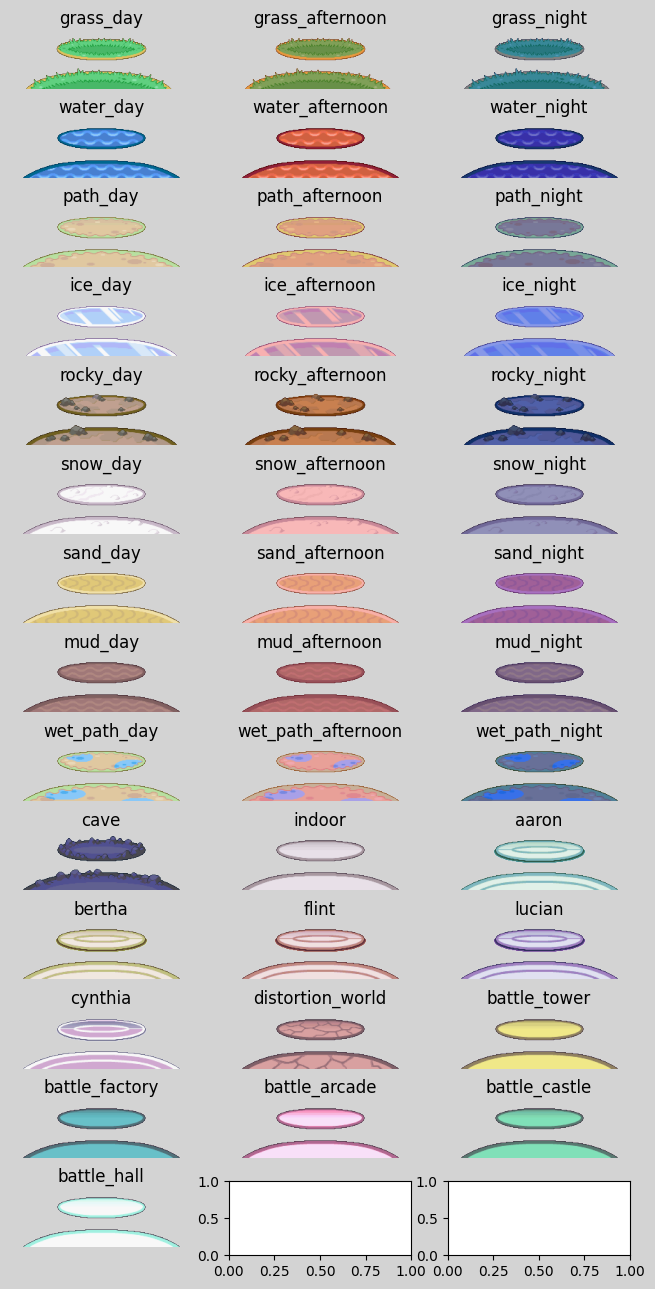

In [9]:
from PIL import Image, ImageFile
import matplotlib.axes
import matplotlib.pyplot as plt
import math

NUM_BATTLE_SPOTS = 40
file_path = "pokemon_pt_battle_backgrounds.png"
crops = []
nrows, ncols = math.ceil(NUM_BATTLE_SPOTS / 3), 3
fig, axes = plt.subplots(nrows, ncols, figsize=(8, 16))
fig.set_facecolor("lightgray")
img = Image.open(file_path)

for i in range(NUM_BATTLE_SPOTS):
  row, col = i // 3, i % 3
  x1, y1 = 768, 16
  x2, y2 = 768 + (img.width - x1) / 3, 96
  new_x1, new_y1 = x1 + 256 * col, y1 + 96 * row
  new_x2, new_y2 = x2 + 256 * col, y2 + 96 * row
  process(file_path, img, axes, battle_spot_names, i, new_x1, new_y1, new_x2, new_y2)
  crops.append({
      "image_name": battle_spot_names[i],
      "crop": {"x1": new_x1, "y1": new_y1, "x2": new_x2, "y2": new_y2}
  })

import json

# Save to crops.json
with open("battle_spot_crops.json", "w") as f:
    json.dump(crops, f, indent=4)  # indent=4 makes it human-readable



In [10]:
import json
import os
from pathlib import Path

def create_images():
  """Convert .json file to lists"""
  with open("field_crops.json") as f:
      field_data = json.load(f)

  with open("battle_spot_crops.json") as f:
      battle_spot_data = json.load(f)

  fields_dir = Path("../assets/fields")
  battle_spots_dir = Path("../assets/battle_spots")

  fields_dir.mkdir(exist_ok=True)
  battle_spots_dir.mkdir(exist_ok=True)

  base_sprites = Image.open("pokemon_pt_battle_backgrounds.png")

  for data in field_data:
    output_path = Path(f"{fields_dir}/{data['image_name']}.png")
    if not output_path.exists():
      img = base_sprites.crop((data["crop"]["x1"], data["crop"]["y1"], data["crop"]["x2"], data["crop"]["y2"]))
      img.save(fields_dir / f"{data['image_name']}.png")

  for data in battle_spot_data:
    output_path = Path(f"{battle_spots_dir}/{data['image_name']}.png")
    if not output_path.exists():
      img = base_sprites.crop((data["crop"]["x1"], data["crop"]["y1"], data["crop"]["x2"], data["crop"]["y2"]))
      img.save(battle_spots_dir / f"{data['image_name']}.png")


In [11]:
import random
import os
import shutil

# Remove directories for testing
dir_path = "fields"
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)

dir_path = "battle_spots"
if os.path.exists(dir_path):
    shutil.rmtree(dir_path)

In [12]:
# Create image folders
create_images()

In [13]:
def split_battle_spot(file_name: str):
  # Split the battle spots (user and opponents battle spot)
  battle_spot = Image.open(file_name)
  crop_offset = 0
  if file_name == "cynthia":
    crop_offset = 10
  elif file_name in ["aaron", "bertha", "bertha", "lucian"]:
    crop_offset = 20

  battle_spot_left = battle_spot.crop((0, battle_spot.height / 2 - (crop_offset), 256, battle_spot.height))
  battle_spot_right = battle_spot.crop((0, 0, 256, battle_spot.height / 2 + (crop_offset)))
  
  return battle_spot_left, battle_spot_right

def show_spots(img1: Image, img2: Image):
  # --- Figure 1 ---
  fig1, ax1 = plt.subplots(figsize=(6, 3))
  fig1.patch.set_facecolor("lightblue")   # sets the *figure* background color
  ax1.set_facecolor("lightyellow")        # sets the *axes* background color
  ax1.axis("off")
  ax1.imshow(img1)
  fig1.suptitle("User Battle Spot", color="black")

  # --- Figure 2 ---
  fig2, ax2 = plt.subplots(figsize=(6, 3))
  fig2.patch.set_facecolor("lightgreen")  # sets the *figure* background color
  ax2.set_facecolor("lightpink")          # sets the *axes* background color
  ax2.axis("off")
  ax2.imshow(img2)
  fig2.suptitle("Opponent Battle Spot", color="black")

  plt.show()

256 80


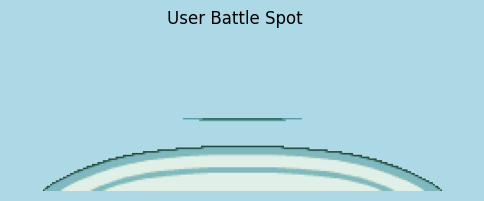

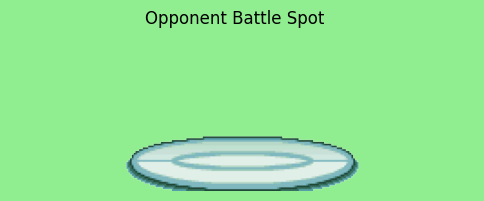

256 80


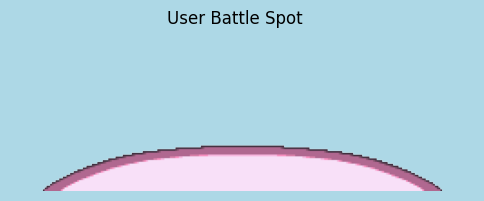

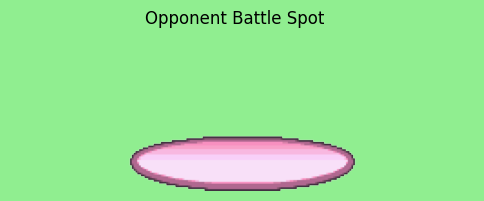

256 80


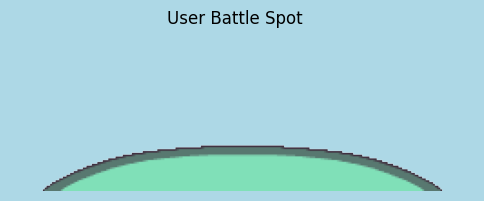

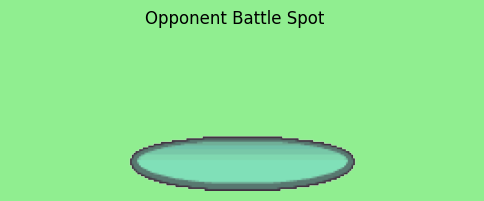

256 80


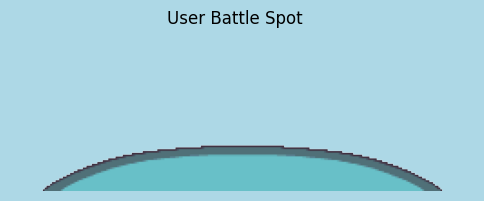

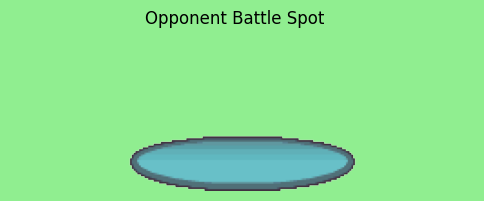

256 80


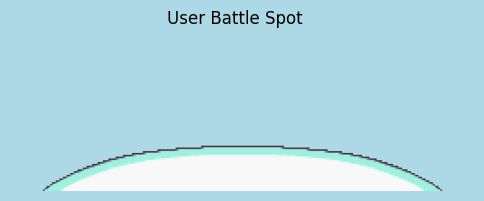

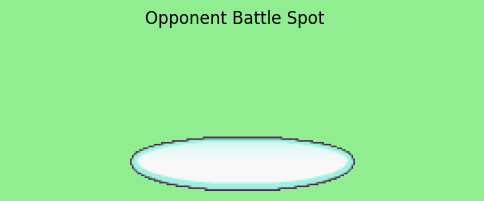

256 80


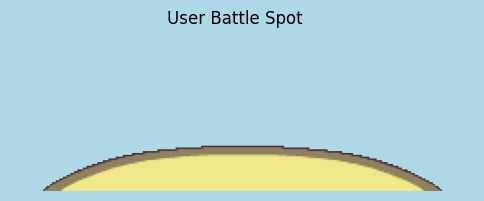

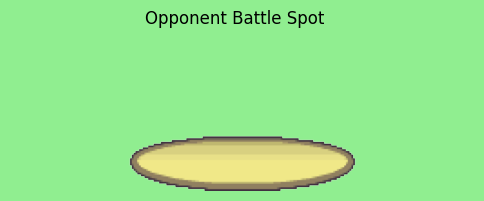

256 80


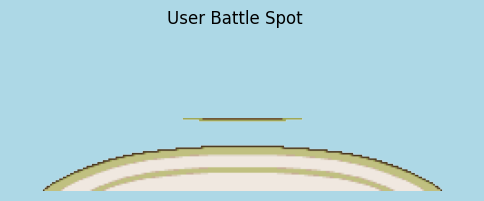

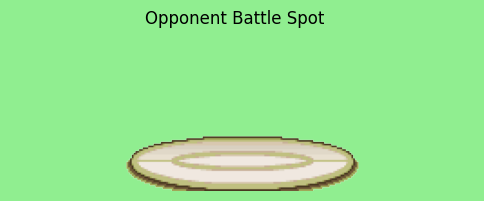

256 80


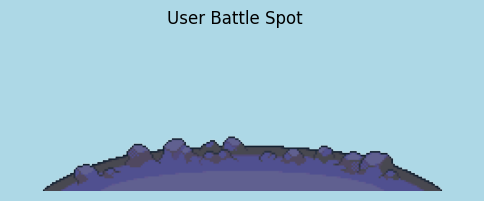

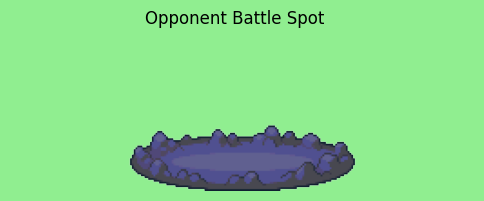

256 80


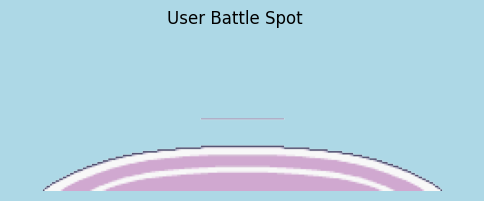

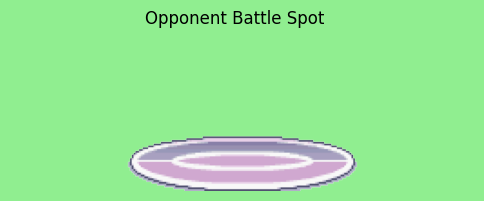

256 80


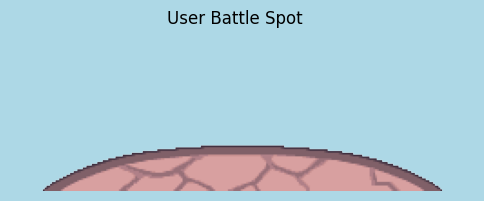

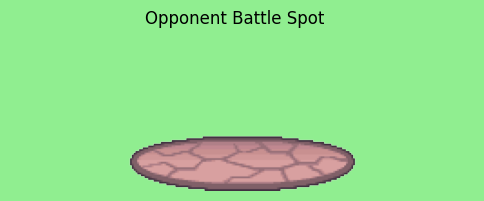

256 80


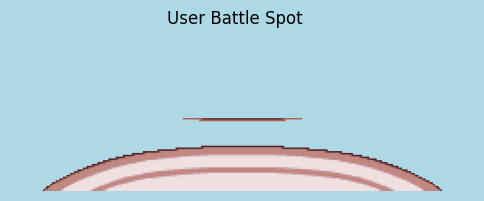

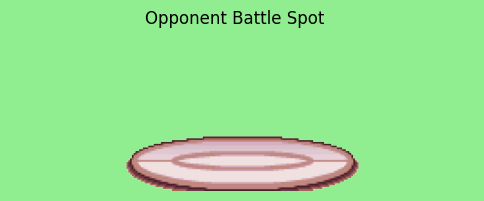

256 80


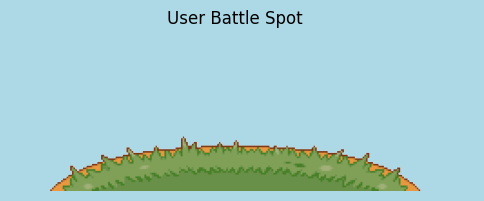

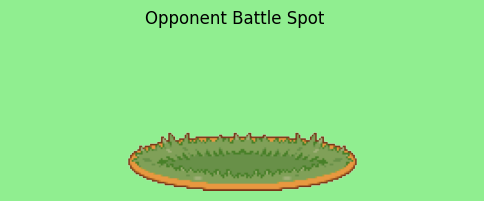

256 80


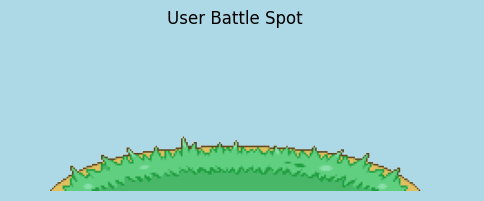

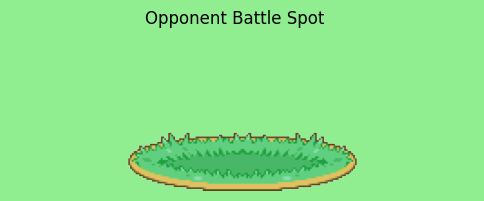

256 80


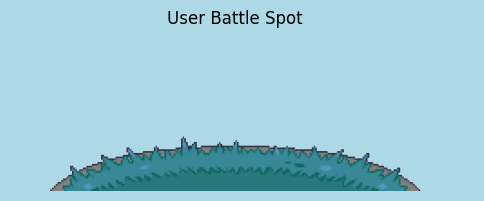

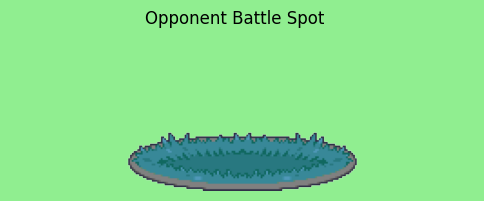

256 80


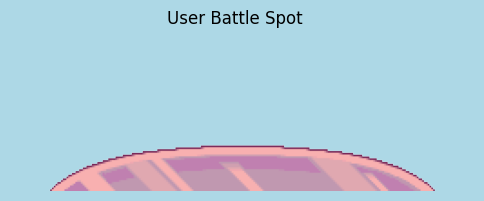

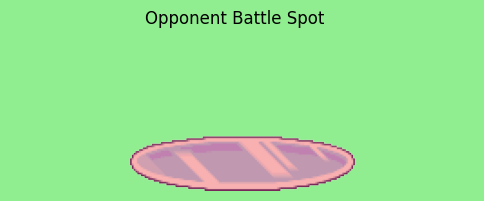

256 80


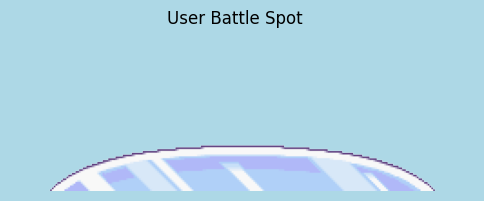

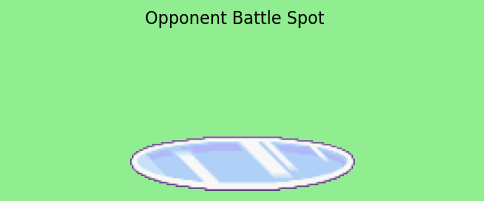

256 80


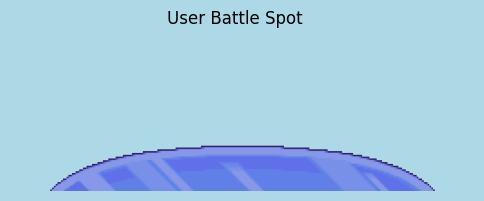

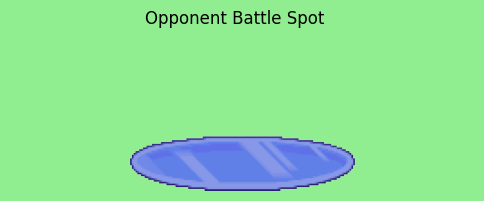

256 80


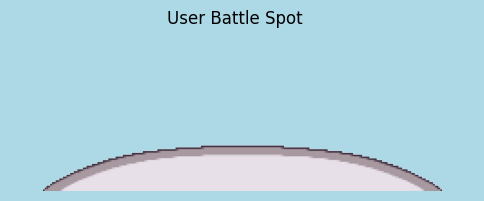

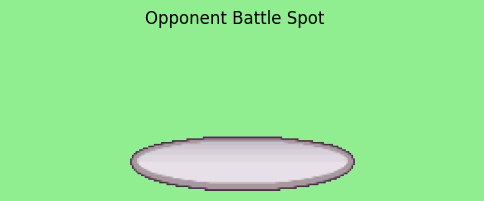

256 80


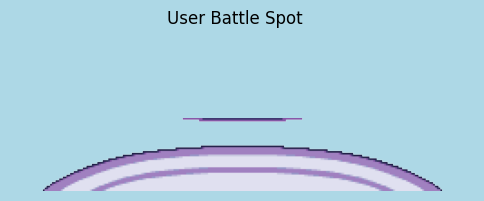

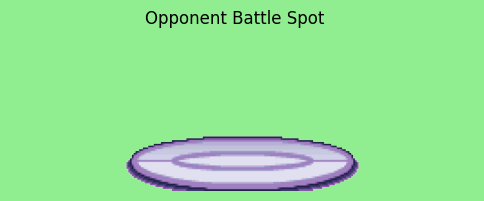

256 80


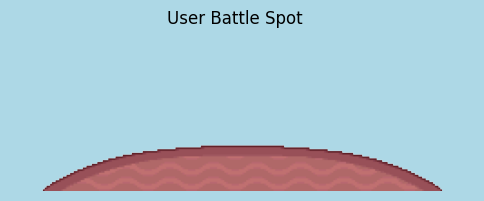

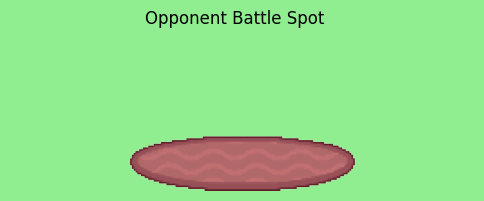

256 80


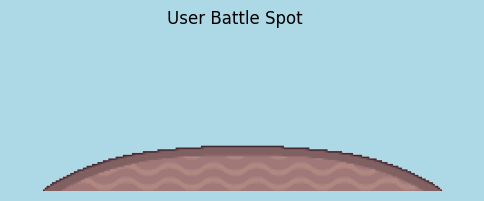

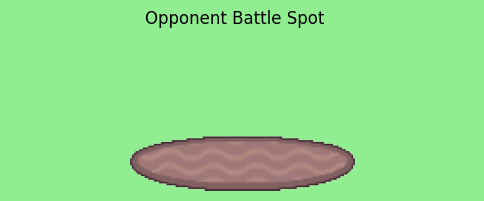

256 80


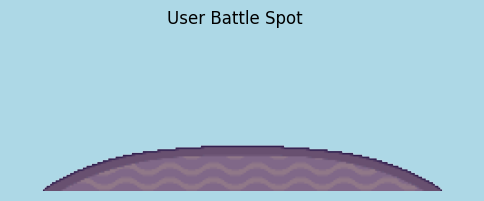

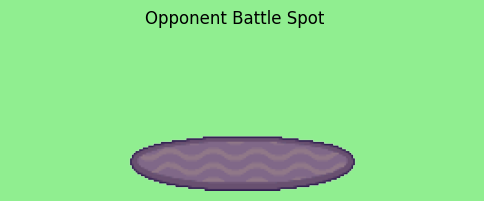

256 80


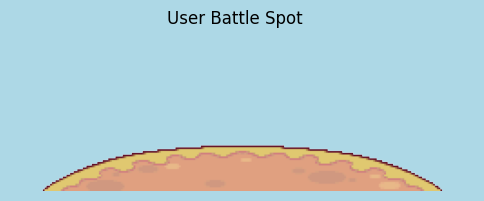

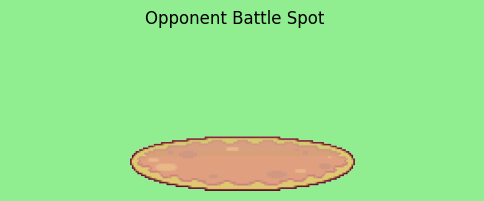

256 80


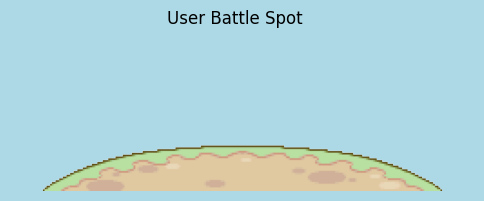

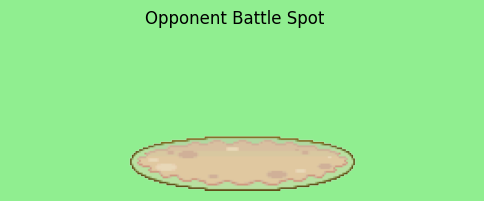

256 80


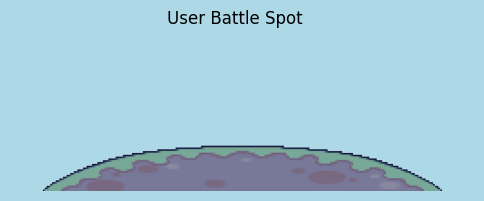

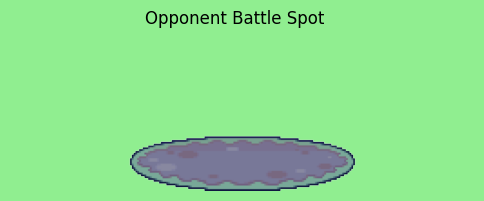

256 80


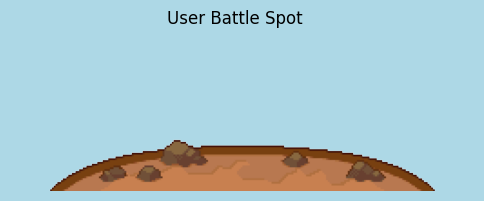

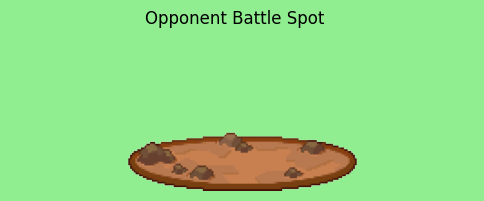

256 80


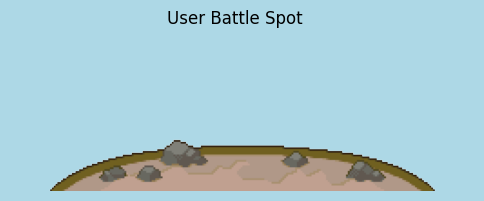

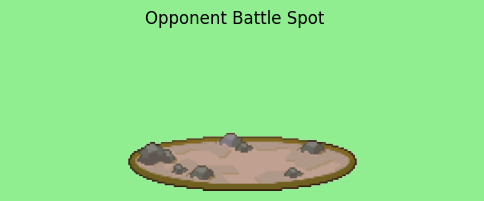

256 80


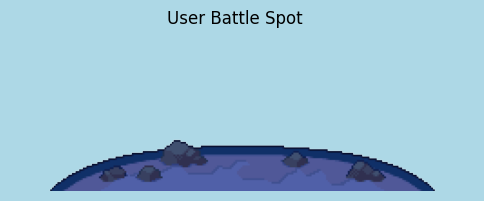

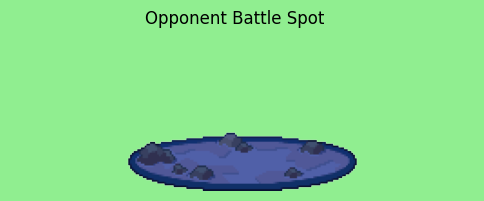

256 80


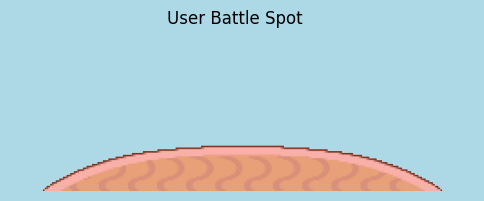

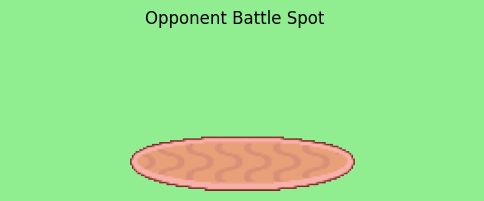

256 80


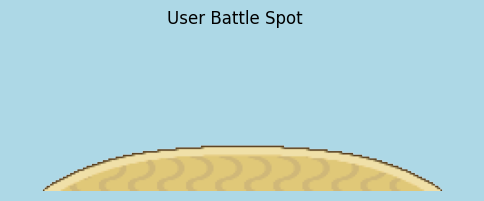

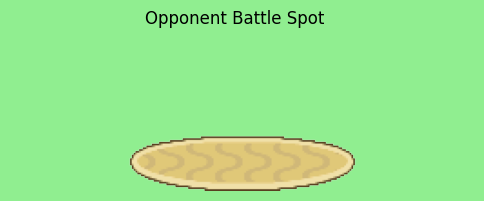

256 80


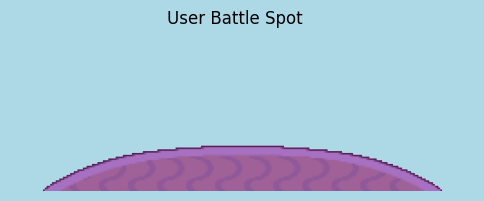

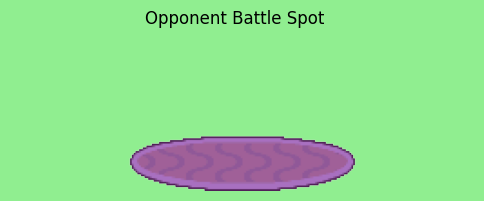

256 80


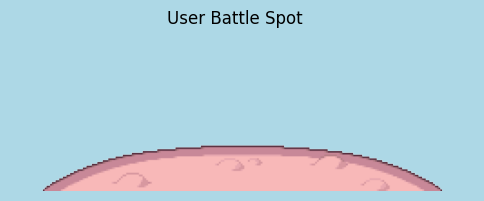

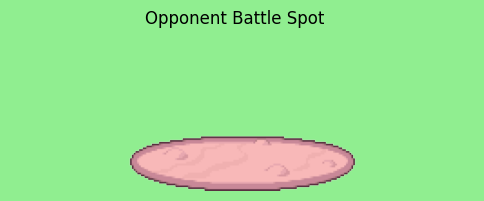

256 80


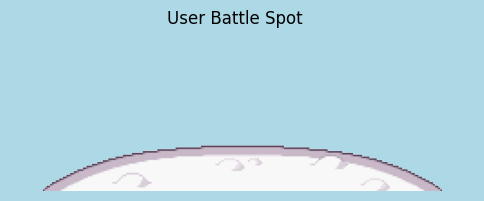

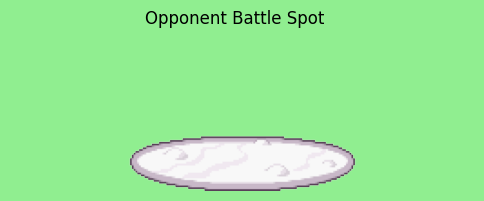

256 80


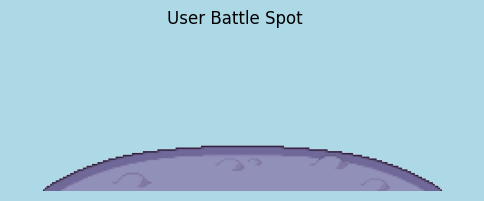

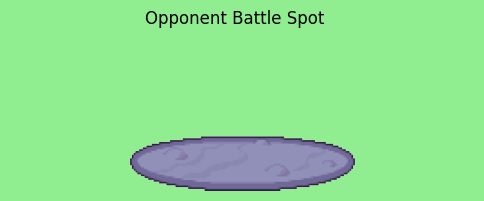

256 80


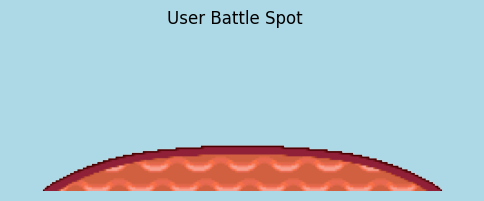

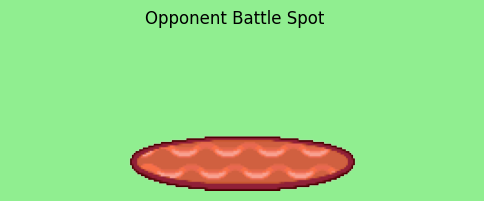

256 80


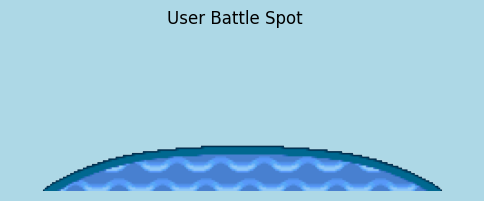

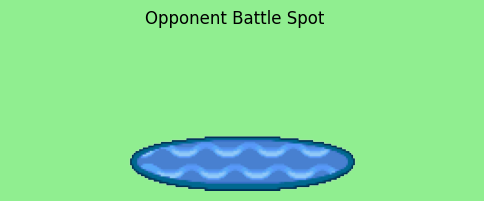

256 80


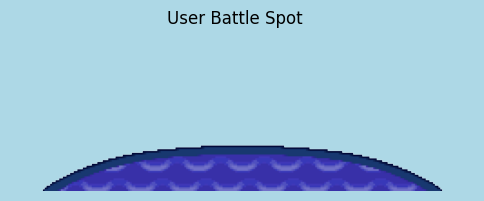

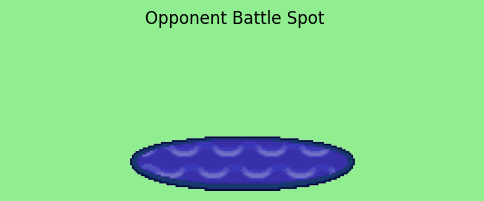

256 80


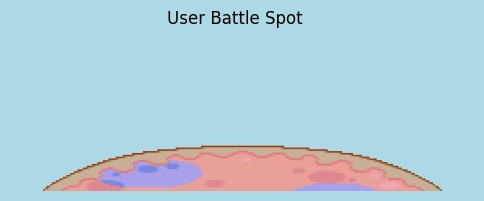

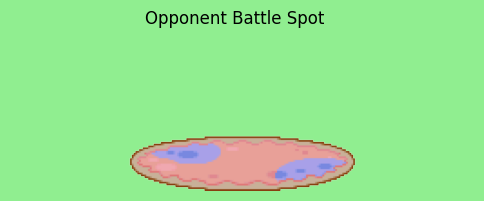

256 80


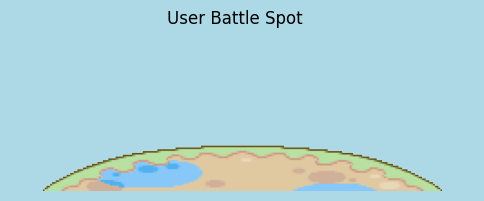

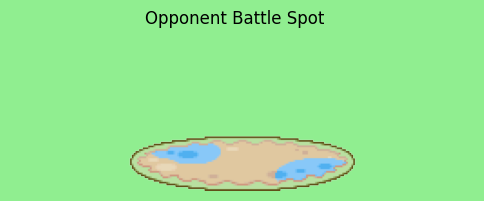

256 80


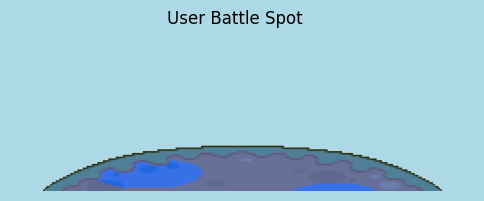

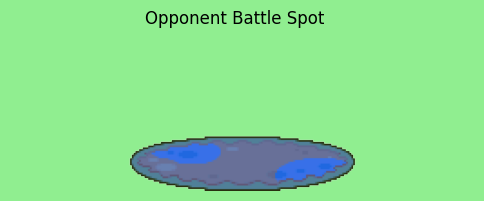

In [14]:
battle_spot_files = list(Path("../assets/battle_spots").glob("*.png"))
for f in battle_spot_files:
    bs_img = Image.open(f)
    print(bs_img.width, bs_img.height)
    left, right = split_battle_spot(f)
    show_spots(left, right)

In [15]:
from PIL import Image, ImageDraw
def generate_shadow(img: Image, center: tuple[int, int], widths: list[int], doubled_center: bool):
    img_draw = ImageDraw.Draw(img)
    
    for i, w in enumerate(widths):
        x1 = center[0] - (w / 2)
        x2 = center[0] + (w / 2)
        y1 = center[1] - i if doubled_center == False else center[1] - i - 1
        y2 = center[1] + i
        img_draw.line(xy=[(x1, y1), (x2, y1)], fill=(98, 85, 101, 255), width=1)
        img_draw.line(xy=[(x1, y2), (x2, y2)], fill=(98, 85, 101, 255), width=1)
    
    return img

In [229]:
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

def generate_encounter(game: str, pkmn_index: int, x: int, y: int, center: tuple[int, int], widths: list[int], doubled_center: bool):
  dataset_dir = "../assets/PokemonGen4/"
  rand_field = Image.open("../assets/fields/surf_night.png")
  #rand_spot = Image.open("battle_spots/grass_day.png")
  rand_spot_left, rand_spot_right = split_battle_spot("../assets/battle_spots/grass_night.png")
  sprite = Image.open(dataset_dir + f"sprites_db/{pkmn_index}/{game}-n.png")
  sprite = sprite.convert("RGBA")
  #print(sprite.mode, sprite.info)

  rand_field.paste(im=rand_spot_left, box=(-64, 120), mask=rand_spot_left)
  rand_field.paste(im=rand_spot_right, box=(64, 64), mask=rand_spot_right)
  rand_field = generate_shadow(img=rand_field, center=center, widths=widths, doubled_center=doubled_center)
  #img_draw = ImageDraw.Draw(rand_field)
  #img_draw.line(xy=[(5, 5), (5, 100)], fill=(98, 85, 101, 255), width = 5)
  rand_field.paste(im=sprite, box=(x, y), mask=sprite)

  #plt.figure(figsize=(24, 24))
  #plt.subplot(1, 2, 1)
  #plt.title("In Game Encounter")
  #plt.axis("off")
  #plt.imshow(encounter)
  #
  #plt.subplot(1, 2, 2)
  #plt.title("Generated Encounter")
  #plt.axis("off")
  #plt.imshow(rand_field)
  #plt.show()
  return rand_field

In [17]:
#import json
#
#with open("encounter_info.json") as f:
#    encounter_dict = json.load(f)
#
#with open("encounter_shadows.json") as f:
#    shadow_dict = json.load(f)
#
#idx = "493"
#
#x, y = 152, 10
#widths_selector = {0: [0], 1: [25, 23, 19, 11], 2: [35, 33, 27, 17], 3: [49, 47, 43, 35 ,21]}
#widths_key = 3
#center_x, center_y = 187, 86 if widths_key == 1 else 87
#center = (center_x, center_y)
#widths = widths_selector[widths_key]
#dc = False if widths_key == 1 else True
#generate_encounter(game="hgss", pkmn_index=idx, x=x, y=y, center=center, widths=widths, doubled_center=dc)
#
#dp_x, dp_y = encounter_dict[str(idx)]["dp"]["x"], encounter_dict[str(idx)]["dp"]["y"]
#dp_center = tuple(shadow_dict[str(idx)]["dp"]["center"])
#dp_widths = shadow_dict[str(idx)]["dp"]["widths"]
#dp_dc = shadow_dict[str(idx)]["dp"]["doubled_center"]
#generate_encounter(game="dp", pkmn_index=idx, x=dp_x, y=dp_y, center=dp_center, widths=dp_widths, doubled_center=dp_dc)
#
#print(encounter_dict[str(idx)]["hgss"]["x"], encounter_dict[str(idx)]["hgss"]["y"])
#print(shadow_dict[str(idx)]["hgss"]["center"], shadow_dict[str(idx)]["hgss"]["widths"], shadow_dict[str(idx)]["hgss"]["doubled_center"])
#print(encounter_dict[str(idx)]["dp"]["x"], encounter_dict[str(idx)]["dp"]["y"])
#print(shadow_dict[str(idx)]["dp"]["center"], shadow_dict[str(idx)]["dp"]["widths"], shadow_dict[str(idx)]["dp"]["doubled_center"])

In [18]:
#with open("encounter_info.json", "r") as f:
#    try:
#        encounter_dict = dict(json.load(f))
#    except Exception as e:
#        print({e})
#        encounter_dict = {}
#    encounter_dict[str(idx)]["hgss"] = {"x": x, "y": y}
#with open("encounter_info.json", "w") as f:
#    print(encounter_dict[str(idx)])
#    json.dump(encounter_dict, f, indent=4)
#
#with open("encounter_shadows.json", "r") as f:
#    try:
#        encounter_dict = dict(json.load(f))
#    except Exception as e:
#        print({e})
#        encounter_dict = {}
#    encounter_dict[str(idx)]["hgss"] = {"center" : center, "widths": widths, "doubled_center": dc}
#with open("encounter_shadows.json", "w") as f:
#    print(encounter_dict[str(idx)])
#    json.dump(encounter_dict, f, indent=4)

Text(0.5, 1.0, 'HGSS Encounter')

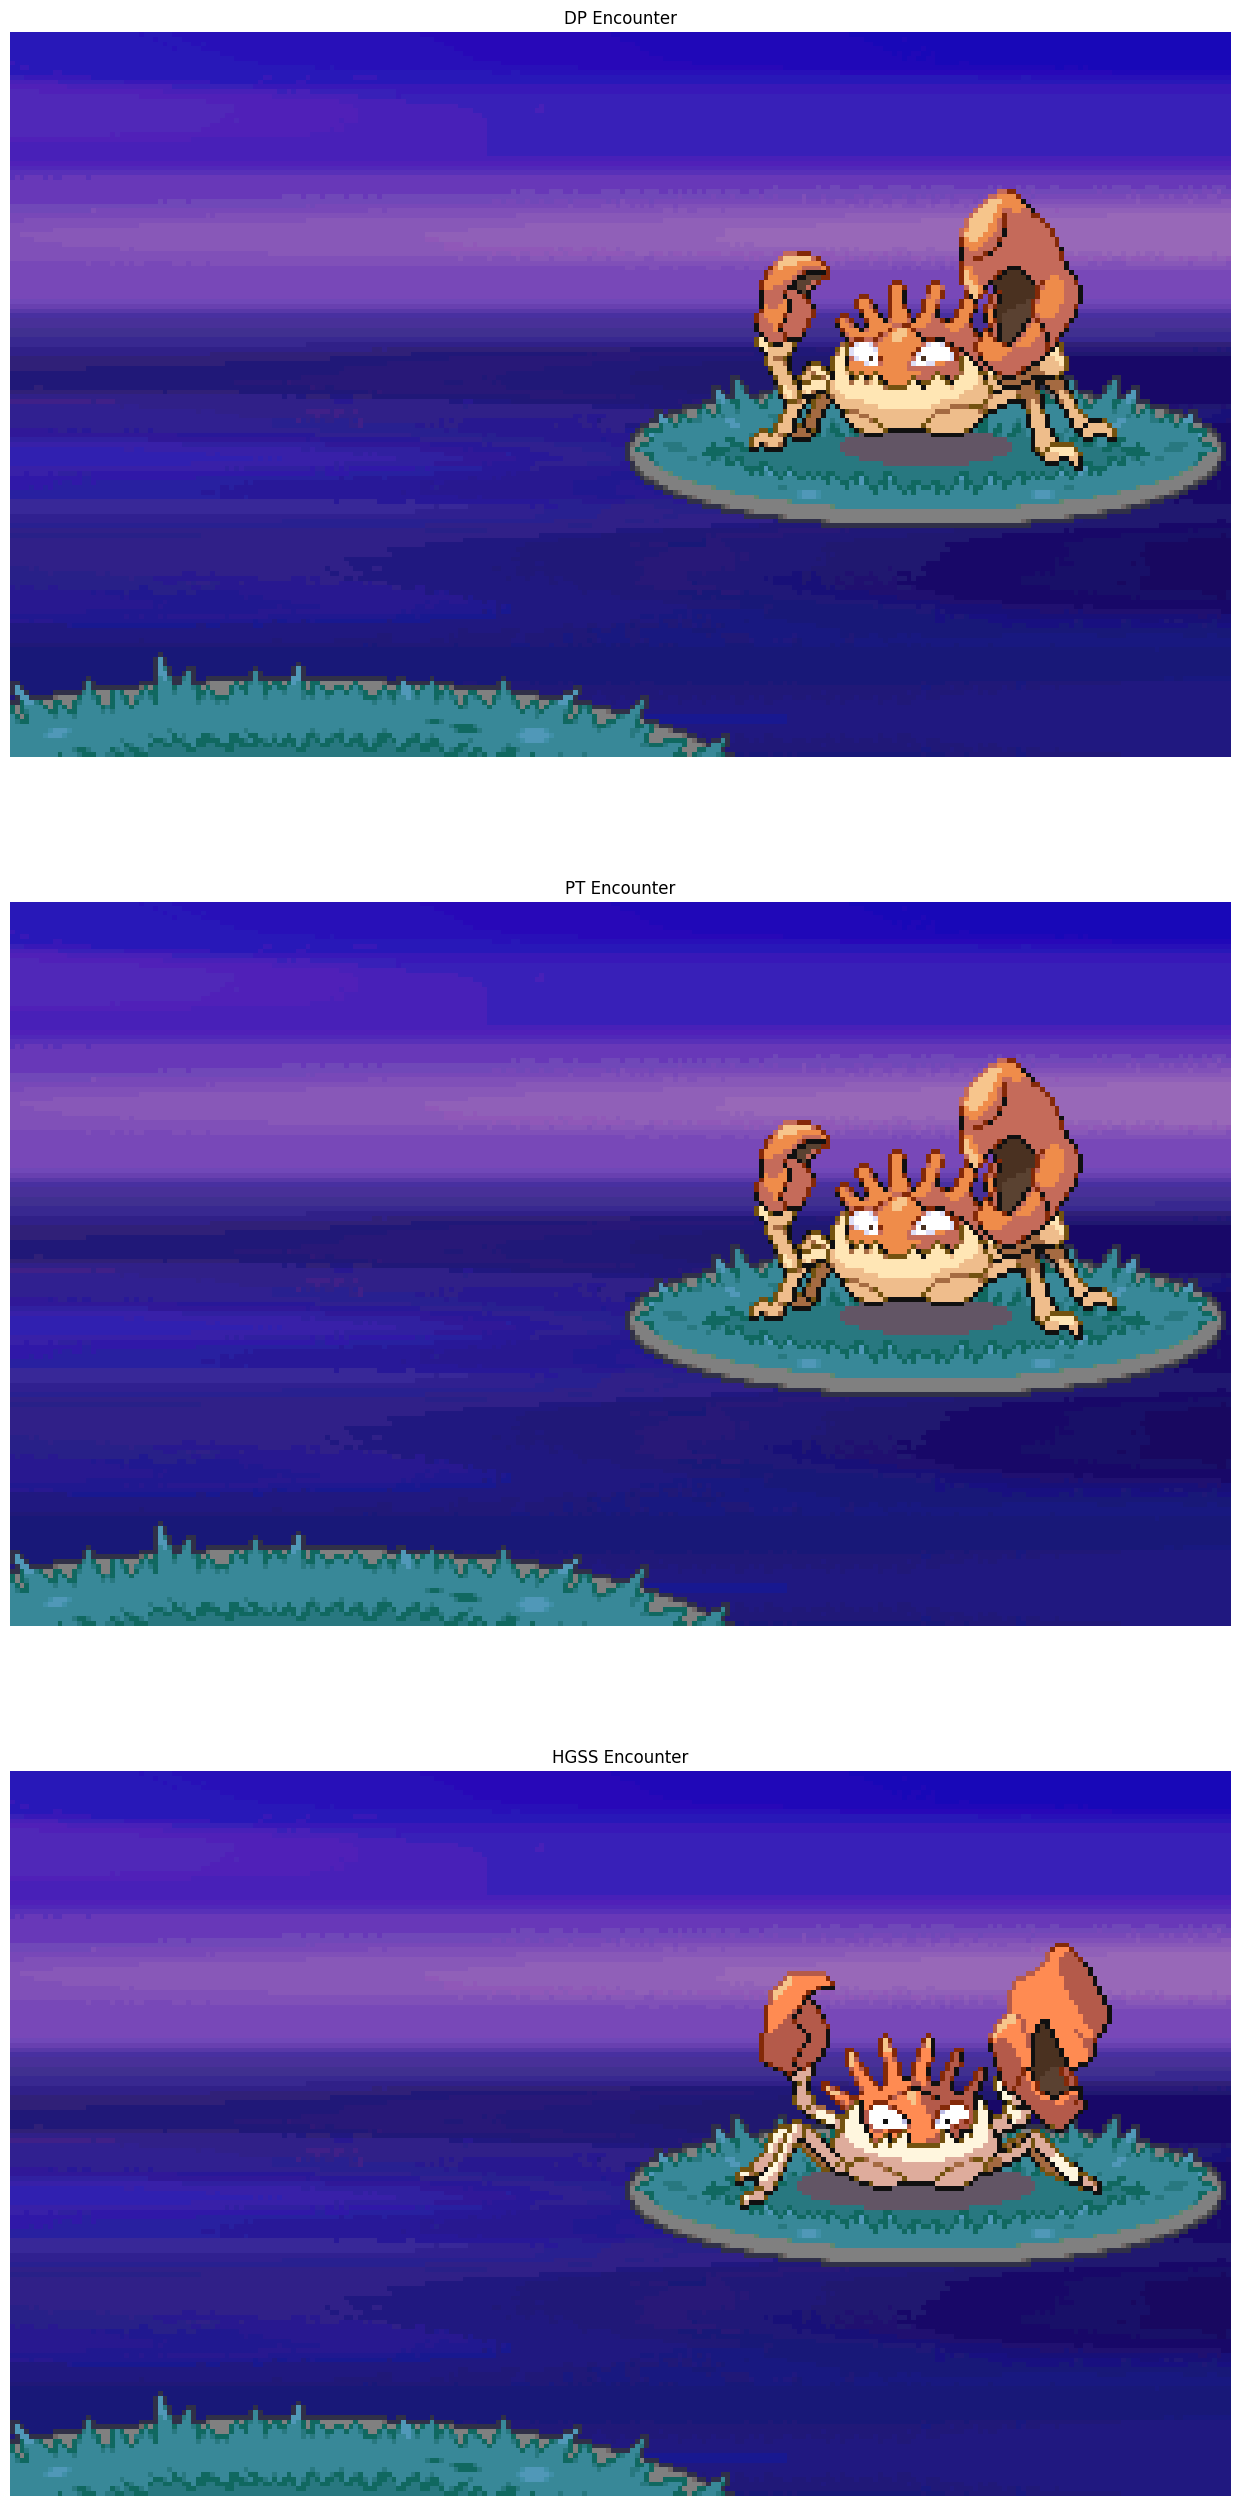

In [ ]:
import json

with open("encounter_info.json", "r") as f:
    encounter_dict = json.load(f)
with open("encounter_shadows.json", "r") as f:
    shadow_dict = json.load(f)

idx = 100
pkmn_idx = str(idx)
dp_encounter = generate_encounter(game="dp", pkmn_index=idx, x=encounter_dict[pkmn_idx]["dp"]["x"], y=encounter_dict[pkmn_idx]["dp"]["y"], center=shadow_dict[pkmn_idx]["dp"]["center"], widths=shadow_dict[pkmn_idx]["dp"]["widths"], doubled_center=shadow_dict[pkmn_idx]["dp"]["doubled_center"])
pt_encounter = generate_encounter(game="pt", pkmn_index=idx, x=encounter_dict[pkmn_idx]["pt"]["x"], y=encounter_dict[pkmn_idx]["pt"]["y"], center=shadow_dict[pkmn_idx]["pt"]["center"], widths=shadow_dict[pkmn_idx]["pt"]["widths"], doubled_center=shadow_dict[pkmn_idx]["pt"]["doubled_center"])
hgss_encounter = generate_encounter(game="hgss", pkmn_index=idx, x=encounter_dict[pkmn_idx]["hgss"]["x"], y=encounter_dict[pkmn_idx]["hgss"]["y"], center=shadow_dict[pkmn_idx]["hgss"]["center"], widths=shadow_dict[pkmn_idx]["hgss"]["widths"], doubled_center=shadow_dict[pkmn_idx]["hgss"]["doubled_center"])

plt.figure(figsize=(32, 32))
plt.subplot(3, 1, 1)
plt.imshow(dp_encounter)
plt.axis("off")
plt.title("DP Encounter")

plt.subplot(3, 1, 2)
plt.imshow(pt_encounter)
plt.axis("off")
plt.title("PT Encounter")

plt.subplot(3, 1, 3)
plt.imshow(hgss_encounter)
plt.axis("off")
plt.title("HGSS Encounter")

In [563]:
# Copy DP to PT
encounter_dict[pkmn_idx]["pt"] = encounter_dict[pkmn_idx]["dp"]
shadow_dict[pkmn_idx]["pt"] = shadow_dict[pkmn_idx]["dp"]

with open("encounter_info.json", "w") as f:
    json.dump(encounter_dict, f, indent=4)

with open("encounter_shadows.json", "w") as f:
    json.dump(shadow_dict, f, indent=4)